# Décomposition des Séries Temporelles

Une série temporelle peut être décomposée en trois composants : tendance, saisonnalité et résidu. Plusieurs algorithmes peuvent être employés pour extraire des lissages des estimateurs de ces trois composants d'un jeu de données constituant la réalisation d'une série chronologique, au premier rang duquel $\rm LOESS$ (*Locally Estimated Scatterplot Smoothing*).

Cette technique de régression non-paramètrique met en oeuvre une fonction pour capturer la variation dans un nuage de point tout en réduisant le bruit et avec des hypothèses minimales sur les relations entre les variables.

```{admonition} N.B.
:class: tip
LOESS est très flexible, ce qui le rend idéal pour modéliser des processus complexes pour lesquels aucun modèle théorique n'existe. Cependant, elle nécessite des jeux de données assez grands et densément échantillonnés afin de produire de bons modèles.
```

L'outil offert par la bibliothèque `statsmodels` pour la décomposition des séries temporelles est la méthode `STL`, implémentant la régression $\rm LOESS$. Les paramètres clés de cette fonction sont :

+ `seasonal` : longueur du lissage de la composante saisonnière. Doit être obligatoirement impair.
+ `trend` : longueur du lissage de la tendance, généralement environ $150\%$ de `seasonal`. Doit être obligatoirement impair et supérieur à la longueur de la saisonnalité.
+ `low_pass` : longueur de la fenêtre d'estimation passe-bas. Correspond généralement au plus petit nombre impair plus grand que la périodicité de la série.

On commence d'emblée par importer les paquets requis, notamment `matplotlib.pyplot`, `pandas` et `numpy`, puis préparer l'environnement graphique et les données.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(20,12))
plt.rc("font", size=14)

Le jeu de données en question est une série des émissions quotidiennes du gaz atmosphérique CO2 à partir de janvier 1959 à décembre 1987, enregistrée dans l'observatoire de Mauna Loa à Hawaii, inspiré de l'ouvrage de *Cleveland, McRae, and Terpenning* (1990) sur $\rm LOESS$. Il présente une tendance et une saisonnalité flagrantes sur l'ensemble de l'échantillon.

In [2]:
co2 = [
    315.58,
    316.39,
    316.79,
    317.82,
    318.39,
    318.22,
    316.68,
    315.01,
    314.02,
    313.55,
    315.02,
    315.75,
    316.52,
    317.10,
    317.79,
    319.22,
    320.08,
    319.70,
    318.27,
    315.99,
    314.24,
    314.05,
    315.05,
    316.23,
    316.92,
    317.76,
    318.54,
    319.49,
    320.64,
    319.85,
    318.70,
    316.96,
    315.17,
    315.47,
    316.19,
    317.17,
    318.12,
    318.72,
    319.79,
    320.68,
    321.28,
    320.89,
    319.79,
    317.56,
    316.46,
    315.59,
    316.85,
    317.87,
    318.87,
    319.25,
    320.13,
    321.49,
    322.34,
    321.62,
    319.85,
    317.87,
    316.36,
    316.24,
    317.13,
    318.46,
    319.57,
    320.23,
    320.89,
    321.54,
    322.20,
    321.90,
    320.42,
    318.60,
    316.73,
    317.15,
    317.94,
    318.91,
    319.73,
    320.78,
    321.23,
    322.49,
    322.59,
    322.35,
    321.61,
    319.24,
    318.23,
    317.76,
    319.36,
    319.50,
    320.35,
    321.40,
    322.22,
    323.45,
    323.80,
    323.50,
    322.16,
    320.09,
    318.26,
    317.66,
    319.47,
    320.70,
    322.06,
    322.23,
    322.78,
    324.10,
    324.63,
    323.79,
    322.34,
    320.73,
    319.00,
    318.99,
    320.41,
    321.68,
    322.30,
    322.89,
    323.59,
    324.65,
    325.30,
    325.15,
    323.88,
    321.80,
    319.99,
    319.86,
    320.88,
    322.36,
    323.59,
    324.23,
    325.34,
    326.33,
    327.03,
    326.24,
    325.39,
    323.16,
    321.87,
    321.31,
    322.34,
    323.74,
    324.61,
    325.58,
    326.55,
    327.81,
    327.82,
    327.53,
    326.29,
    324.66,
    323.12,
    323.09,
    324.01,
    325.10,
    326.12,
    326.62,
    327.16,
    327.94,
    329.15,
    328.79,
    327.53,
    325.65,
    323.60,
    323.78,
    325.13,
    326.26,
    326.93,
    327.84,
    327.96,
    329.93,
    330.25,
    329.24,
    328.13,
    326.42,
    324.97,
    325.29,
    326.56,
    327.73,
    328.73,
    329.70,
    330.46,
    331.70,
    332.66,
    332.22,
    331.02,
    329.39,
    327.58,
    327.27,
    328.30,
    328.81,
    329.44,
    330.89,
    331.62,
    332.85,
    333.29,
    332.44,
    331.35,
    329.58,
    327.58,
    327.55,
    328.56,
    329.73,
    330.45,
    330.98,
    331.63,
    332.88,
    333.63,
    333.53,
    331.90,
    330.08,
    328.59,
    328.31,
    329.44,
    330.64,
    331.62,
    332.45,
    333.36,
    334.46,
    334.84,
    334.29,
    333.04,
    330.88,
    329.23,
    328.83,
    330.18,
    331.50,
    332.80,
    333.22,
    334.54,
    335.82,
    336.45,
    335.97,
    334.65,
    332.40,
    331.28,
    330.73,
    332.05,
    333.54,
    334.65,
    335.06,
    336.32,
    337.39,
    337.66,
    337.56,
    336.24,
    334.39,
    332.43,
    332.22,
    333.61,
    334.78,
    335.88,
    336.43,
    337.61,
    338.53,
    339.06,
    338.92,
    337.39,
    335.72,
    333.64,
    333.65,
    335.07,
    336.53,
    337.82,
    338.19,
    339.89,
    340.56,
    341.22,
    340.92,
    339.26,
    337.27,
    335.66,
    335.54,
    336.71,
    337.79,
    338.79,
    340.06,
    340.93,
    342.02,
    342.65,
    341.80,
    340.01,
    337.94,
    336.17,
    336.28,
    337.76,
    339.05,
    340.18,
    341.04,
    342.16,
    343.01,
    343.64,
    342.91,
    341.72,
    339.52,
    337.75,
    337.68,
    339.14,
    340.37,
    341.32,
    342.45,
    343.05,
    344.91,
    345.77,
    345.30,
    343.98,
    342.41,
    339.89,
    340.03,
    341.19,
    342.87,
    343.74,
    344.55,
    345.28,
    347.00,
    347.37,
    346.74,
    345.36,
    343.19,
    340.97,
    341.20,
    342.76,
    343.96,
    344.82,
    345.82,
    347.24,
    348.09,
    348.66,
    347.90,
    346.27,
    344.21,
    342.88,
    342.58,
    343.99,
    345.31,
    345.98,
    346.72,
    347.63,
    349.24,
    349.83,
    349.10,
    347.52,
    345.43,
    344.48,
    343.89,
    345.29,
    346.54,
    347.66,
    348.07,
    349.12,
    350.55,
    351.34,
    350.80,
    349.10,
    347.54,
    346.20,
    346.20,
    347.44,
    348.67,
]
co2 = pd.Series(co2, index=pd.date_range("1-1-1959", periods=len(co2), freq="M"), name="CO2")
co2.describe()

count    348.000000
mean     330.123879
std       10.059747
min      313.550000
25%      321.302500
50%      328.820000
75%      338.002500
max      351.340000
Name: CO2, dtype: float64

La décomposition nécessite un seul argument, la série de données. Si la série n'a pas de fréquence, il faut spécifier la période `period`. La valeur par défaut de `seasonal` est 7.

In [3]:
from statsmodels.tsa.seasonal import STL
stl = STL(co2, seasonal=13)
res = stl.fit()

## Ajustement Robuste

Spécifier le paramètre `robuste` permet d'utiliser une fonction de pondération dépendant des données qui repondère les données lors de l'estimation de la $\rm LOESS$ (donnant ainsi $\rm LOWESS$). L'utilisation de l'estimation robuste permet au modèle de tolérer des erreurs plus importantes comme celles visibles sur le graphique du bas ci-dessus.

Nous utilisons ici une série qui mesure la production d'équipements électriques dans l'UE.

In [4]:
from statsmodels.datasets import elec_equip as ds

elec_equip = ds.load().data

Ensuite, nous estimons le modèle avec et sans pondération robuste. La différence est mineure et est plus prononcée pendant la crise financière de 2008. L'estimation non robuste attribue des poids égaux à toutes les observations et produit donc des erreurs plus faibles, en moyenne. Les pondérations varient entre 0 et 1.

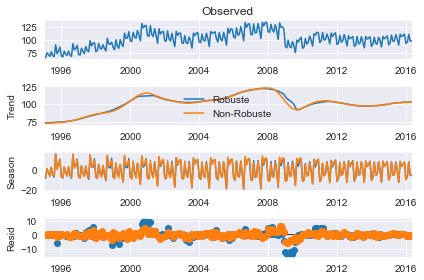

In [5]:
def add_stl_plot(fig, res, legend):
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)


stl = STL(elec_equip, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(elec_equip, period=12, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robuste", "Non-Robuste"])

```{admonition} Conclusion
:class: note
L'ajustement robuste est clairement plus performant, dès lors qu'il reflète mieux la tendance de la série temporelle étant donnée une anomalie dans les observations.
```

## Degré du $\rm LOESS$

La configuration par défaut estime le modèle $\rm LOESS$ avec à la fois une constante et une tendance. Ceci peut être modifié pour n'inclure qu'une constante en spécifiant `COMPONENT_deg` à 0. Ici, le degré a peu d'influence, sauf pour la tendance autour de la crise financière de 2008.

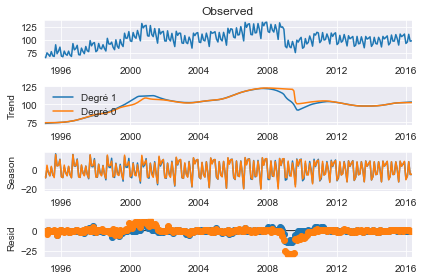

In [6]:
stl = STL(elec_equip, period=12, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True)
res_deg_0 = stl.fit()
fig = res_robust.plot()
add_stl_plot(fig, res_deg_0, ["Degré 1", "Degré 0"])

## Complexité & Performance

Trois options peuvent être utilisées pour réduire le coût calculatoire de la décomposition `STL` : `seasonal_jump`, `trend_jump` et `low_pass_jump`. 

Lorsque ces valeurs sont différentes de zéro, $\rm LOESS$ de la composante `COMPONENT` est estimé uniquement à partir des observations `COMPONENT_jump`, et une interpolation linéaire est effectuée entre les points. Ces valeurs ne devraient normalement pas être supérieures à $10-20\%$ de la taille de `seasonal`, `trend` ou `low_pass`, respectivement.

L'exemple ci-dessous montre comment ceux-ci peuvent réduire le coût de calcul d'un facteur de 15 fois en utilisant des données générées avec une tendance cosinusoïdale à basse fréquence et un modèle saisonnier sinusoïdal.

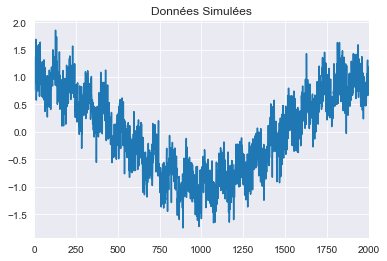

In [7]:
rs = np.random.RandomState(0xA4FD94BC)
tau = 2000
t = np.arange(tau)
period = int(0.05 * tau)
seasonal = period + ((period % 2) == 0)  # Obligatoirement impair!
e = 0.25 * rs.standard_normal(tau)
y = np.cos(t / tau * 2 * np.pi) + 0.25 * np.sin(t / period * 2 * np.pi) + e
plt.plot(y)
plt.title("Données Simulées")
xlim = plt.gca().set_xlim(0, tau)

Tout d'abord, le modèle de base est estimé avec tous les sauts égaux à 1.

238 ms ± 577 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


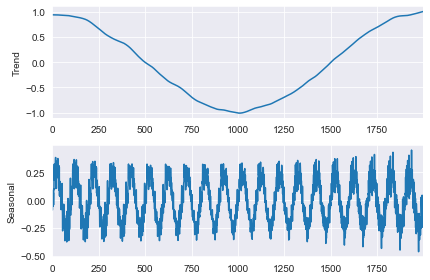

In [8]:
mod = STL(y, period=period, seasonal=seasonal)
%timeit mod.fit()
res = mod.fit()
fig = res.plot(observed=False, resid=False)

Les sauts sont tous fixés à $15\%$ de la longueur de leur fenêtre. L'interpolation linéaire limitée fait peu de différence dans l'ajustement du modèle.

16.7 ms ± 37.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


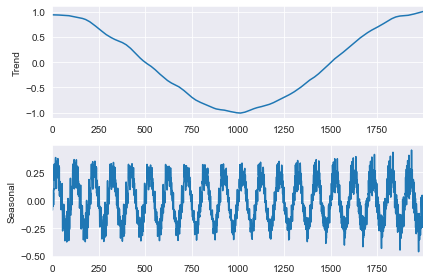

In [9]:
low_pass_jump = seasonal_jump = int(0.15 * (period + 1))
trend_jump = int(0.15 * 1.5 * (period + 1))
mod = STL(y,period=period,seasonal=seasonal,seasonal_jump=seasonal_jump,trend_jump=trend_jump,low_pass_jump=low_pass_jump,)
%timeit mod.fit()
res = mod.fit()
fig = res.plot(observed=False, resid=False)

```{admonition} Bilan
:class: tip
Les options susmentionnées améliorent significativement le temps d'exécution de la décomposition, et ce même pour des sauts très faibles.
```

## Prédiction au moyen de `STL`

`STLForecast` simplifie le processus de décomposition de la STL pour supprimer les saisonnalités et ensuite utiliser un modèle de série temporelle standard pour prévoir la tendance et les composantes cycliques.

Dans le cas envisagé, on emploie `STL` pour traiter la saisonnalité, puis un modèle $\mathrm{ARIMA}(1,1,0)$ pour modéliser les données désaisonnalisées.

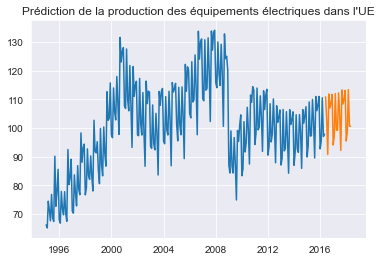

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

elec_equip.index.freq = elec_equip.index.inferred_freq
stlf = STLForecast(elec_equip, ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
plt.plot(elec_equip)
plt.plot(forecast)
plt.title("Prédiction de la production des équipements électriques dans l'UE")
plt.show()

`summary` renvoie des informations à la fois sur le modèle de séries temporelles et la décomposition `STL` :

In [11]:
print(stlf_res.summary())

                    STL Decomposition and SARIMAX Results                     
Dep. Variable:                      y   No. Observations:                  257
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -522.434
Date:                Thu, 05 Jan 2023   AIC                           1050.868
Time:                        23:24:41   BIC                           1061.504
Sample:                    01-01-1995   HQIC                          1055.146
                         - 05-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1171      0.118      0.995      0.320      -0.113       0.348
ar.L1         -0.0435      0.049     -0.880      0.379      -0.140       0.053
sigma2         3.4682      0.188     18.406      0.0